<a href="https://colab.research.google.com/github/rohanroney/Play-Store-App-Review-Analysis/blob/main/Rohan_Roney_Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

In [6]:
# Import all the important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Creating dataframes for both playstore data as well as user reviews data

In [8]:
# Reading the data from the csv files
working_directory = '/content/drive/MyDrive/AlmaBetter/Cohort Nilgiri/Module 1/Week 4/Capstone Project 1-Play Store App Review Analysis/dat/'
play_store_df = pd.read_csv(working_directory + 'Play Store Data.csv')
user_reviews_df = pd.read_csv(working_directory + 'User Reviews.csv')

###Understanding the Play Store data

In [9]:
play_store_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [10]:
play_store_df.shape

(10841, 13)

In [11]:
play_store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [12]:
play_store_df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [13]:
play_store_df[play_store_df['Rating']>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [14]:
len(list(play_store_df['App'].unique()))

9660

### Remove duplicates

In [15]:
play_store = play_store_df.copy()

In [16]:
play_store.drop_duplicates(subset ="App", keep = 'last', inplace = True) 

In [17]:
play_store.shape

(9660, 13)

In [18]:
play_store.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9660 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9660 non-null   object 
 1   Category        9660 non-null   object 
 2   Rating          8197 non-null   float64
 3   Reviews         9660 non-null   object 
 4   Size            9660 non-null   object 
 5   Installs        9660 non-null   object 
 6   Type            9659 non-null   object 
 7   Price           9660 non-null   object 
 8   Content Rating  9659 non-null   object 
 9   Genres          9660 non-null   object 
 10  Last Updated    9660 non-null   object 
 11  Current Ver     9652 non-null   object 
 12  Android Ver     9657 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1.0+ MB


In [19]:
play_store['Rating'].median()

4.3

In [20]:
play_store[play_store['Rating'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5.7M,"100,000+",Free,0,Everyone 10+,Beauty,"September 20, 2017",8.0,3.0 and up
123,Manicure - nail design,BEAUTY,NaN,119,3.7M,"50,000+",Free,0,Everyone,Beauty,"July 23, 2018",1.3,4.1 and up
126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7.4M,"100,000+",Free,0,Teen,Beauty,"July 17, 2018",1.15,4.1 and up
129,"Secrets of beauty, youth and health",BEAUTY,NaN,77,2.9M,"10,000+",Free,0,Mature 17+,Beauty,"August 8, 2017",2.0,2.3 and up
130,Recipes and tips for losing weight,BEAUTY,NaN,35,3.1M,"10,000+",Free,0,Everyone 10+,Beauty,"December 11, 2017",2.0,3.0 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10824,Cardio-FR,MEDICAL,NaN,67,82M,"10,000+",Free,0,Everyone,Medical,"July 31, 2018",2.2.2,4.4 and up
10825,Naruto & Boruto FR,SOCIAL,NaN,7,7.7M,100+,Free,0,Teen,Social,"February 2, 2018",1.0,4.0 and up
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8M,"5,000+",Free,0,Everyone,Maps & Navigation,"June 13, 2018",2.0.148.0,4.0 and up
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up


In [21]:
# Replace NaN values and the oulier values of Rating with the mean values
play_store['Rating'] = play_store['Rating'].fillna(play_store['Rating'].median())


In [22]:
play_store = play_store.drop(10472)

In [23]:
play_store.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9659 non-null   object 
 1   Category        9659 non-null   object 
 2   Rating          9659 non-null   float64
 3   Reviews         9659 non-null   object 
 4   Size            9659 non-null   object 
 5   Installs        9659 non-null   object 
 6   Type            9658 non-null   object 
 7   Price           9659 non-null   object 
 8   Content Rating  9659 non-null   object 
 9   Genres          9659 non-null   object 
 10  Last Updated    9659 non-null   object 
 11  Current Ver     9651 non-null   object 
 12  Android Ver     9657 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1.0+ MB


In [24]:
list(play_store['Size'].unique())

['19M',
 '8.7M',
 '25M',
 '2.8M',
 '5.6M',
 '29M',
 '33M',
 '3.1M',
 '28M',
 '12M',
 '20M',
 '21M',
 '37M',
 '2.7M',
 '5.5M',
 '17M',
 '39M',
 '31M',
 '14M',
 '4.2M',
 '23M',
 '6.0M',
 '6.1M',
 '4.6M',
 '9.2M',
 '5.2M',
 '11M',
 'Varies with device',
 '9.4M',
 '15M',
 '10M',
 '1.2M',
 '24M',
 '26M',
 '8.0M',
 '7.9M',
 '56M',
 '57M',
 '35M',
 '54M',
 '201k',
 '3.6M',
 '5.7M',
 '8.6M',
 '2.4M',
 '27M',
 '2.5M',
 '7.0M',
 '16M',
 '3.4M',
 '8.9M',
 '3.9M',
 '2.9M',
 '38M',
 '32M',
 '5.4M',
 '18M',
 '1.1M',
 '2.2M',
 '4.5M',
 '9.8M',
 '52M',
 '9.0M',
 '6.7M',
 '30M',
 '2.6M',
 '7.1M',
 '3.7M',
 '22M',
 '7.4M',
 '6.4M',
 '3.2M',
 '8.2M',
 '9.9M',
 '4.9M',
 '9.5M',
 '5.0M',
 '5.9M',
 '13M',
 '73M',
 '6.8M',
 '3.5M',
 '4.0M',
 '2.3M',
 '7.2M',
 '2.1M',
 '42M',
 '7.3M',
 '9.1M',
 '55M',
 '23k',
 '6.5M',
 '1.5M',
 '7.5M',
 '46M',
 '51M',
 '48M',
 '8.5M',
 '41M',
 '8.3M',
 '4.3M',
 '4.7M',
 '3.3M',
 '40M',
 '7.8M',
 '8.8M',
 '6.6M',
 '5.1M',
 '61M',
 '8.4M',
 '118k',
 '44M',
 '695k',
 '1.6M',
 '1

In [25]:
play_store['Installs'].value_counts()

1,000,000+        1419
100,000+          1114
10,000+           1031
10,000,000+        933
1,000+             887
100+               709
5,000,000+         607
500,000+           504
50,000+            469
5,000+             468
10+                385
500+               328
50,000,000+        204
50+                204
100,000,000+       189
5+                  82
1+                  67
500,000,000+        24
1,000,000,000+      20
0+                  14
0                    1
Name: Installs, dtype: int64

In [26]:
def convert_to_float(value):

  ''' Returns evaluated value '''
  return eval(value)


In [27]:
# Changing the Reviews column to float type
play_store['Reviews'] = play_store['Reviews'].apply(convert_to_float)


In [28]:
def convert_size_value(value):

  ''' Converting KB to MB and giving out the result'''

  if (value[-1]=='M'):
    val = value[0:-1]  
    return eval(val)

  elif (value[-1]=='k'):
    val = value[0:-1]
    return (eval(val))/1000

  else:
    return 0


In [29]:
# Formatting of Size data
play_store['Size'] = play_store['Size'].apply(convert_size_value)
play_store.loc[play_store['Size']==0,'Size'] = play_store.loc[play_store['Size']>0,'Size'].median() 


In [30]:
# Formatting of Installs data
play_store.Installs = play_store.Installs.apply(lambda x: x.strip('+'))
play_store.Installs = play_store.Installs.apply(lambda x: x.replace(',',''))


In [31]:
play_store['Installs'] = play_store['Installs'].apply(convert_to_float)


In [32]:
play_store['Installs'].value_counts()

1000000       1419
100000        1114
10000         1031
10000000       933
1000           887
100            709
5000000        607
500000         504
50000          469
5000           468
10             385
500            328
50000000       204
50             204
100000000      189
5               82
1               67
500000000       24
1000000000      20
0               15
Name: Installs, dtype: int64

In [33]:
play_store.describe()

,Rating,Reviews,Size,Installs
count,9659.000000,9.659000e+03,9659.000000,9.659000e+03
mean,4.192422,2.166512e+05,19.331161,7.794247e+06
std,0.496071,1.830738e+06,20.585379,5.376991e+07
min,1.000000,0.000000e+00,0.008500,0.000000e+00
25%,4.000000,2.500000e+01,5.300000,1.000000e+03
50%,4.300000,9.690000e+02,12.000000,1.000000e+05
75%,4.500000,2.940100e+04,25.000000,1.000000e+06
max,5.000000,7.812821e+07,100.000000,1.000000e+09


#### Cleaning the Type data

In [34]:
play_store.Type.unique()

array(['Free', 'Paid', nan], dtype=object)

In [35]:
play_store[play_store.Type.isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,4.3,0,12.0,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


In [36]:
play_store.Type =play_store.Type.fillna('Free')

#### Cleaning the Price Data

In [37]:
play_store.Price.unique()

array(['0', '$4.99', '$3.99', '$1.49', '$2.99', '$7.99', '$3.49', '$1.99',
       '$5.99', '$6.99', '$9.99', '$7.49', '$0.99', '$1.00', '$2.49',
       '$10.99', '$1.50', '$14.99', '$15.99', '$79.99', '$9.00', '$10.00',
       '$16.99', '$11.99', '$29.99', '$74.99', '$5.49', '$33.99',
       '$24.99', '$39.99', '$19.99', '$4.49', '$1.70', '$8.99', '$2.00',
       '$3.88', '$25.99', '$399.99', '$17.99', '$400.00', '$3.02',
       '$1.76', '$4.84', '$4.77', '$1.61', '$2.50', '$1.59', '$6.49',
       '$1.29', '$5.00', '$13.99', '$299.99', '$379.99', '$37.99',
       '$18.99', '$389.99', '$19.90', '$8.49', '$1.75', '$14.00', '$4.85',
       '$46.99', '$109.99', '$3.95', '$154.99', '$3.08', '$2.59', '$4.80',
       '$1.96', '$19.40', '$3.90', '$4.59', '$15.46', '$3.04', '$12.99',
       '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95', '$2.90',
       '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [38]:
play_store.Price = play_store.Price.apply(lambda x: x.strip('$'))

In [39]:
play_store['Price'] = play_store['Price'].apply(convert_to_float)


In [40]:
play_store.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6,50000,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up


In [41]:
play_store.describe()

,Rating,Reviews,Size,Installs,Price
count,9659.000000,9.659000e+03,9659.000000,9.659000e+03,9659.000000
mean,4.192422,2.166512e+05,19.331161,7.794247e+06,1.097231
std,0.496071,1.830738e+06,20.585379,5.376991e+07,16.851618
min,1.000000,0.000000e+00,0.008500,0.000000e+00,0.000000
25%,4.000000,2.500000e+01,5.300000,1.000000e+03,0.000000
50%,4.300000,9.690000e+02,12.000000,1.000000e+05,0.000000
75%,4.500000,2.940100e+04,25.000000,1.000000e+06,0.000000
max,5.000000,7.812821e+07,100.000000,1.000000e+09,400.000000


### Information based on Category

In [46]:
Category_df = play_store.groupby('Category').agg({'App':"count",'Rating': "mean",'Reviews':"sum",'Installs':"sum",'Size':"median","Price":"mean"}).sort_values(by=['Installs','Rating','Reviews','Size','App'],ascending = [False,False,False,False,False]).rename(columns ={'App':'Num_Apps','Rating':'Avg. Ratings','Reviews':'Total_reviews','Installs':'Total_installs','Size':'Avg_Size(MB)'})

In [47]:
Category_df

,Num_Apps,Avg. Ratings,Total_reviews,Total_installs,Avg_Size(MB),Price
Category,,,,,,
COMMUNICATION,316,4.154747,285824817,11039276251,12.00,0.263101
GAME,926,4.243305,425239248,10897924415,34.00,0.307030
FAMILY,1906,4.200367,345758056,8870642505,17.00,1.264344
TOOLS,829,4.074427,229433729,8102771915,5.20,0.322376
PRODUCTIVITY,374,4.206150,55570346,5788091369,11.00,0.670936
SOCIAL,239,4.255230,227802363,5487867902,11.00,0.066820
PHOTOGRAPHY,281,4.165125,105556805,4658147655,12.00,0.420925
VIDEO_PLAYERS,163,4.066871,67324804,3917002720,12.00,0.064172
TRAVEL_AND_LOCAL,219,4.103196,26817033,2894887146,13.00,0.228082


### Checking categorization based on free/paid apps

In [48]:
type_of_app_df = play_store.groupby('Type').agg({'App':"count",'Rating': "mean",'Reviews':"median",'Installs':"mean",'Size':"median"}).sort_values(by=['App','Rating','Reviews','Installs','Size'],ascending = [False,False,False,False,False]).rename(columns ={'App':'Num_Apps','Rating':'Avg. Ratings','Reviews':'Median_reviews','Installs':'Avg_installs','Size':'Avg_Size(MB)'})

In [49]:
type_of_app_df

,Num_Apps,Avg. Ratings,Median_reviews,Avg_installs,Avg_Size(MB)
Type,,,,,
Free,8905,4.185873,1369.0,8.447757e+06,12.0
Paid,754,4.269761,88.5,7.607929e+04,12.0


#### Distribution of app based on the Type

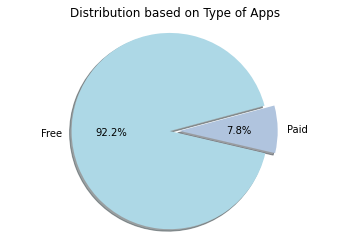

In [50]:
labels = 'Free','Paid'
my_colors = ['lightblue','lightsteelblue']
my_explode = (0,0.1)
plt.pie(type_of_app_df['Num_Apps'], labels=labels ,autopct='%1.1f%%', startangle =15, shadow =True, colors = my_colors, explode=my_explode )
plt.title("Distribution based on Type of Apps")
plt.axis('equal')
plt.show()

#### Top 5 Apps based on Ratings

In [51]:
play_store[['App','Category','Rating']].sort_values(by=['Rating'], ascending = False).head(5)

,App,Category,Rating
7405,Nur təfsiri 1-ci cild,LIBRARIES_AND_DEMO,5.0
7321,CG Jobs,FAMILY,5.0
9427,ei Calc,TOOLS,5.0
5776,Food-Aw - Order Food Online in Aruba,FOOD_AND_DRINK,5.0
7320,CG - Chemistry free,FAMILY,5.0


#### Top 5 Apps based on Reviews

In [52]:
play_store[['App','Category','Reviews']].sort_values(by=['Reviews'], ascending = False).head(5)

,App,Category,Reviews
3943,Facebook,SOCIAL,78128208
3904,WhatsApp Messenger,COMMUNICATION,69109672
3909,Instagram,SOCIAL,66509917
4104,Messenger – Text and Video Chat for Free,COMMUNICATION,56642847
3986,Clash of Clans,FAMILY,44881447


#### Top 5 Apps based on Installations Done

In [53]:
play_store[['App','Category','Installs']].sort_values(by=['Installs'], ascending = False).head(5)

,App,Category,Installs
4153,Hangouts,COMMUNICATION,1000000000
9844,Google News,NEWS_AND_MAGAZINES,1000000000
4104,Messenger – Text and Video Chat for Free,COMMUNICATION,1000000000
4234,Skype - free IM & video calls,COMMUNICATION,1000000000
3928,YouTube,VIDEO_PLAYERS,1000000000


## Doing some visualizations based on the Analysis

#### Plotting the count of apps based on categories





Text(0, 0.5, 'No of apps')

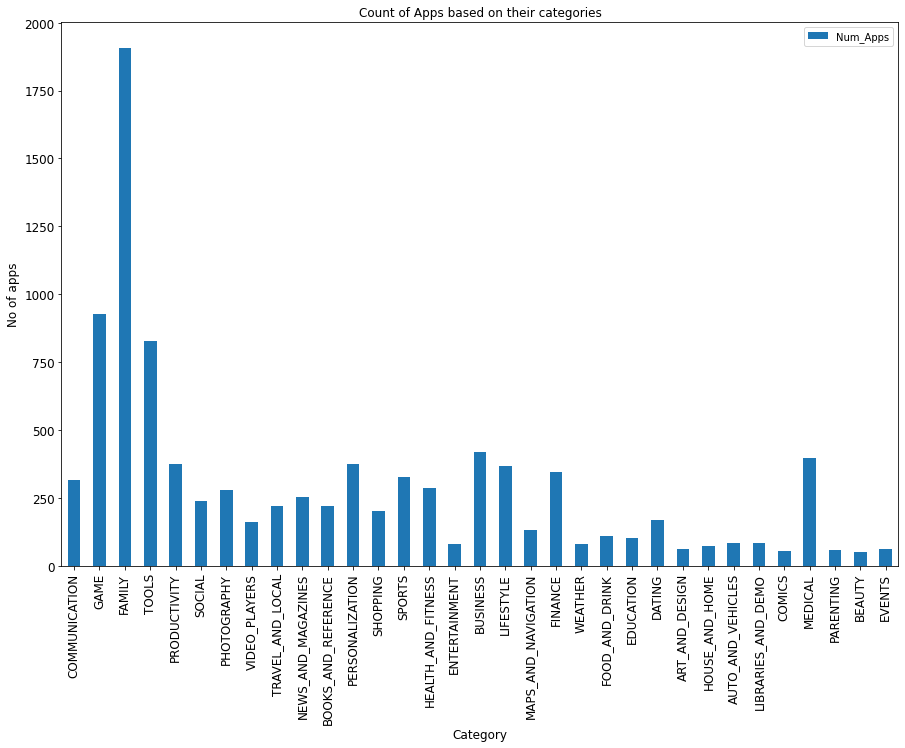

In [54]:
ax = Category_df['Num_Apps'].plot(kind='bar', title ="Count of Apps based on their categories", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Category",fontsize=12)
ax.set_ylabel("No of apps",fontsize=12)

#### Plotting the Apps based on installations in each categories


Text(0, 0.5, 'No of installations')

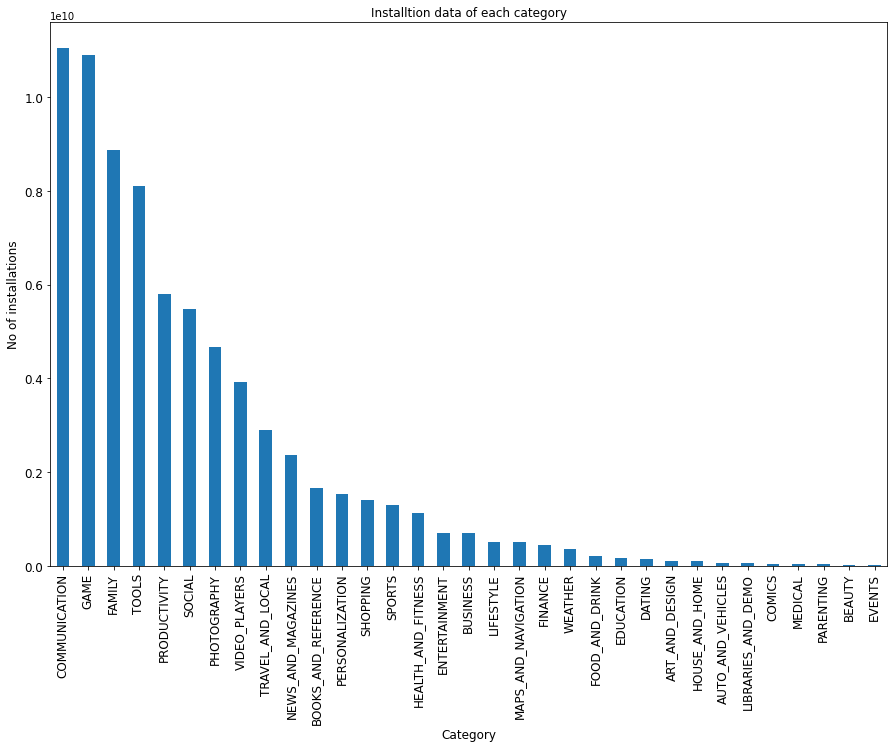

In [55]:
ax = Category_df['Total_installs'].plot(kind='bar', title ="Installtion data of each category", figsize=(15, 10), fontsize=12)
ax.set_xlabel("Category",fontsize=12)
ax.set_ylabel("No of installations",fontsize=12)

Text(0, 0.5, 'Size')

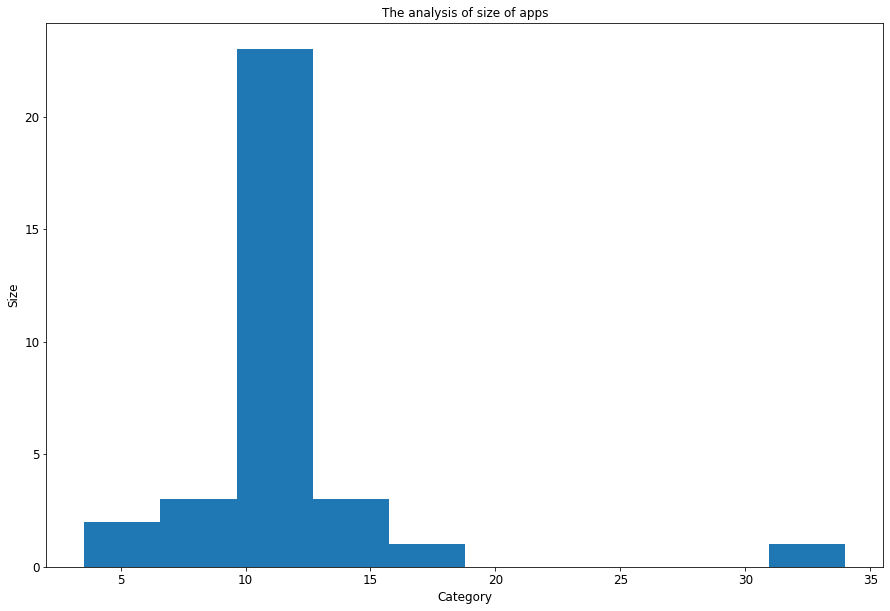

In [58]:
ax = Category_df['Avg_Size(MB)'].plot(kind='hist', title ="The analysis of size of apps", figsize=(15, 10), fontsize=12)
ax.set_xlabel("Category",fontsize=12)
ax.set_ylabel("Size",fontsize=12)


## Understanding the User Reviews Data

In [59]:
# User Review  Data
user_reviews_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [60]:
user_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [61]:
user_reviews_df.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37432.000000,37432.000000
mean,0.182146,0.492704
std,0.351301,0.259949
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


In [62]:
user_reviews_df.loc[0,'App']

'10 Best Foods for You'

In [63]:
user_reviews_df[user_reviews_df['App'] == '10 Best Foods for You']

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.000000,0.300000
...,...,...,...,...,...
195,10 Best Foods for You,Boring. I thought actually just texts that's i...,Negative,-0.325000,0.475000
196,10 Best Foods for You,Love app. It gives way good idea I buying stor...,Positive,0.400000,0.400000
197,10 Best Foods for You,Great Its really best unique provides detailed...,Positive,0.579167,0.683333
198,10 Best Foods for You,Nothing special! Could find anything useful!,Positive,0.410714,0.285714


In [64]:
list(user_reviews_df['App'].unique())

['10 Best Foods for You',
 '104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室',
 '11st',
 '1800 Contacts - Lens Store',
 '1LINE – One Line with One Touch',
 '2018Emoji Keyboard 😂 Emoticons Lite -sticker&gif',
 '21-Day Meditation Experience',
 '2Date Dating App, Love and matching',
 '2GIS: directory & navigator',
 '2RedBeans',
 '2ndLine - Second Phone Number',
 '30 Day Fitness Challenge - Workout at Home',
 '365Scores - Live Scores',
 '3D Blue Glass Water Keyboard Theme',
 '3D Color Pixel by Number - Sandbox Art Coloring',
 '3D Live Neon Weed Launcher',
 '4 in a Row',
 '4K Wallpapers and Ultra HD Backgrounds',
 '591房屋交易-租屋、中古屋、新建案、實價登錄、別墅透天、公寓套房、捷運、買房賣房行情、房價房貸查詢',
 '591房屋交易-香港',
 '7 Cups: Anxiety & Stress Chat',
 '7 Day Food Journal Challenge',
 '7 Minute Workout',
 '7 Weeks - Habit & Goal Tracker',
 '8 Ball Pool',
 '850 Sports News Digest',
 '8fit Workouts & Meal Planner',
 '95Live -SG#1 Live Streaming App',
 'A Call From Santa Claus!',
 'A Manual of Acupuncture',
 'A Word A Day',
 'A&E - Watch Full Ep